In [1]:
#pip install mglearn

In [2]:
import mglearn
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
X, y =  mglearn.datasets.make_forge()

X.shape(26, 2)



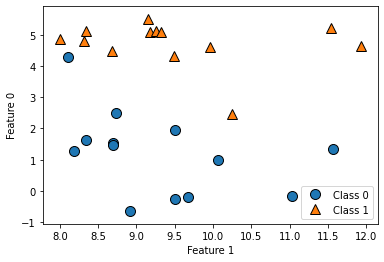

In [5]:
import matplotlib.pyplot as plt

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(['Class 0','Class 1'],loc=4)
plt.xlabel('Feature 1')
plt.ylabel('Feature 0')
print('X.shape{}\n'.format(X.shape))

In [6]:
X,y = mglearn.datasets.make_wave()

In [7]:
X.shape

(100, 1)

Text(0, 0.5, 'Y')

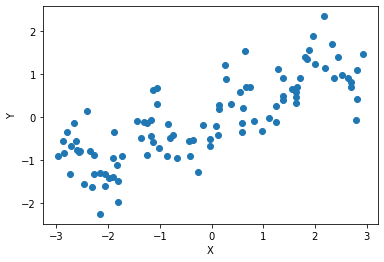

In [8]:
plt.plot(X,y,'o')
plt.xlabel("X")
plt.ylabel('Y')

In [9]:
from sklearn.datasets import load_breast_cancer

In [10]:
cancer = load_breast_cancer()

In [11]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
#ancer.target

In [13]:
#print(cancer.get('DESCR'))

In [14]:
cancer.data.shape
import numpy as np

In [15]:
{n:v for n, v in zip(cancer.target_names,np.bincount(cancer.target)) }

{'malignant': 212, 'benign': 357}

In [16]:
np.bincount(cancer.target)

array([212, 357])

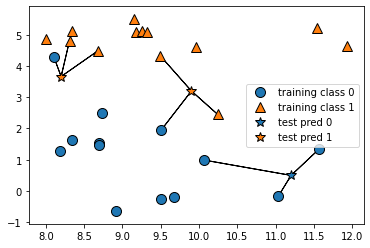

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [19]:
X, y =  mglearn.datasets.make_forge()

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [21]:
X_train.shape

(18, 2)

In [22]:
X_test.shape

(8, 2)

In [23]:
clf = KNeighborsClassifier(n_neighbors=3)

In [24]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
clf.score(X_test,y_test)

0.875

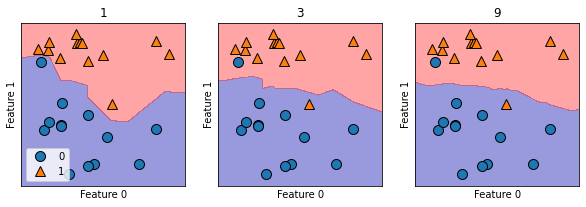

In [26]:
fig,axes = plt.subplots(1,3,figsize = (10,3))

for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,ax = ax,alpha = 0.4, eps = 0.5, fill = True)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax= ax)
    ax.set_title(n_neighbors)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)


In [27]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state =42)

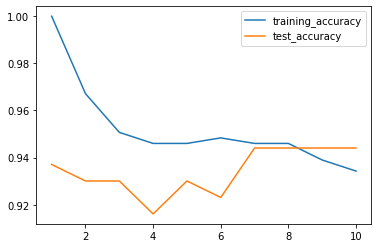

In [28]:
training_accuracy = []
test_accuracy = []

n_neighboring = range(1,11)

for n_neighbors in n_neighboring:
    clf = KNeighborsClassifier(n_neighbors= n_neighbors).fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(n_neighboring,training_accuracy,label= "training_accuracy")
plt.plot(n_neighboring,test_accuracy,label="test_accuracy")
plt.legend()

In [29]:
print("hello")

hello


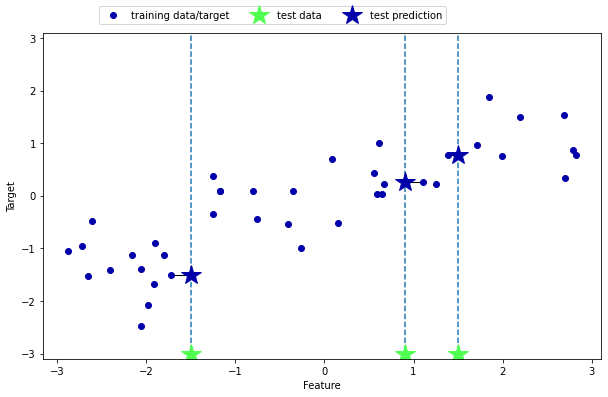

In [30]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

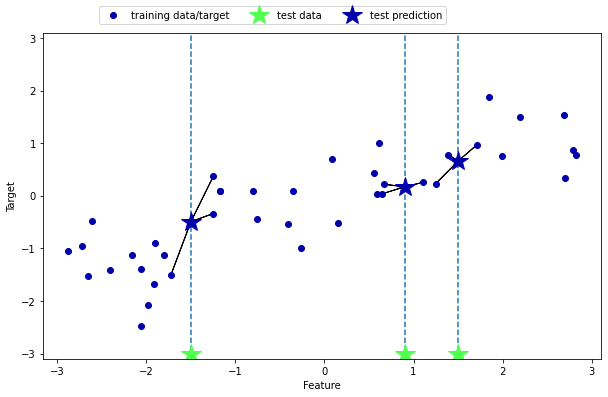

In [31]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
X,y = mglearn.datasets.make_wave(n_samples=60)

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [35]:
reg = KNeighborsRegressor(n_neighbors=3)

In [36]:
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [37]:
reg.score(X_test,y_test)

0.748082820340201

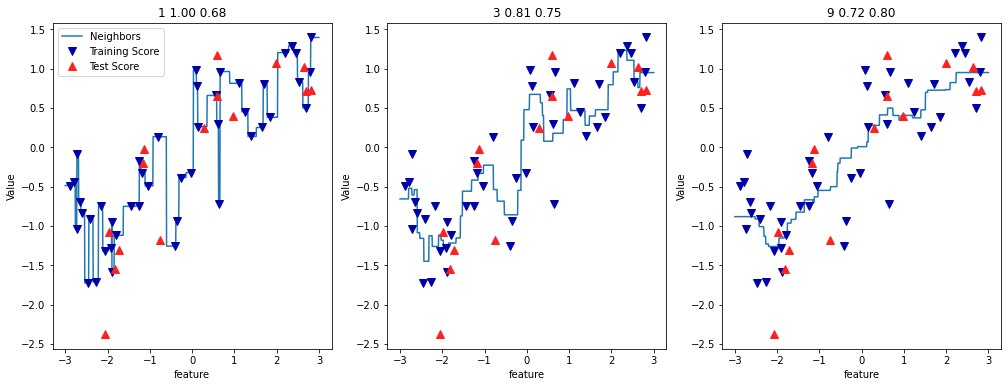

In [38]:
fig, axes = plt.subplots(1,3, figsize =(17,6))

line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'v',c = mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'^',c = mglearn.cm2(1),markersize=8)
    ax.set_title("{} {:.2f} {:.2f}".format(n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("Value")
axes[0].legend(['Neighbors','Training Score','Test Score'],loc="best")


In [39]:
line.shape

(1000, 1)

# Linear Regression

w[0]: 0.393906  b: -0.031804


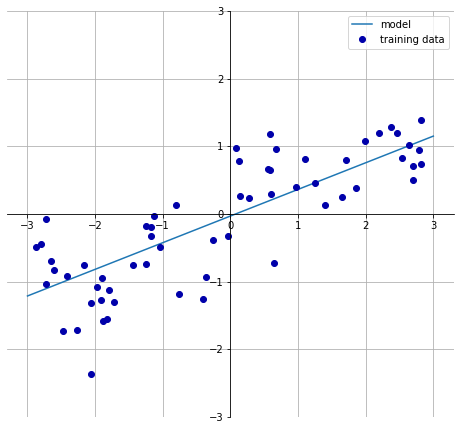

In [40]:
mglearn.plots.plot_linear_regression_wave()

In [41]:
from  sklearn.linear_model import LinearRegression

In [42]:
X,y =  mglearn.datasets.make_wave(n_samples = 70)

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

lreg =  LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression()

In [44]:
print(lreg.coef_)
print(lreg.intercept_)
print(lreg.score(X_train,y_train))
print(lreg.score(X_test,y_test))

[0.36690205]
0.04741867312017016
0.6640438008761198
0.6219098319719389


In [45]:
X,y = mglearn.datasets.load_extended_boston()

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [47]:
lreg =  LinearRegression().fit(X_train,y_train)

In [48]:
lreg.score(X_train,y_train)

0.9448313975211594

In [49]:
lreg.score(X_test,y_test)

0.775837839335171

In [50]:
from sklearn.linear_model import Ridge

In [51]:
ridge = Ridge().fit(X_train,y_train)

In [52]:
ridge.score(X_train,y_train)

0.8700969775259921

In [53]:
ridge.score(X_test,y_test)

0.8145421818415555

In [54]:
ridge10 = Ridge(alpha =10).fit(X_train,y_train)

In [55]:
ridge10.score(X_train,y_train)

0.7669532344928074

In [56]:
ridge10.score(X_test,y_test)

0.7279392273706593

In [57]:
ridge01 = Ridge(alpha =0.1).fit(X_train,y_train)

In [58]:
ridge01.score(X_train,y_train)

0.9174870139232215

In [59]:
ridge01.score(X_test,y_test)

0.8246491875314654

In [60]:
#ridge01.coef_

In [61]:
ridge01.intercept_

6.325019930874522

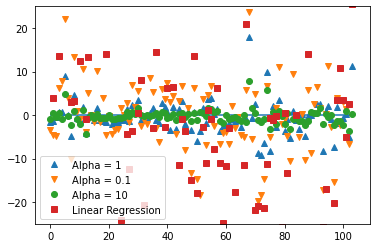

In [62]:
plt.plot(ridge.coef_,'^',label="Alpha = 1")
plt.plot(ridge01.coef_,'v',label="Alpha = 0.1")
plt.plot(ridge10.coef_,'o',label="Alpha = 10")

plt.plot(lreg.coef_,'s',label = "Linear Regression")
plt.hlines(0,0,len(lreg.coef_))
plt.ylim(-25,25)
plt.legend()

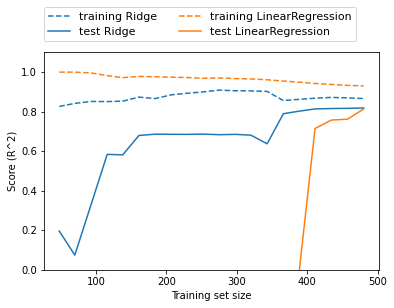

In [63]:
mglearn.plots.plot_ridge_n_samples()

In [64]:
from sklearn.linear_model import Lasso

In [65]:
lass =  Lasso().fit(X_train,y_train)

In [66]:
lass.score(X_train,y_train)

0.26783778369518485

In [67]:
lass.score(X_test,y_test)

0.2599232118344591

In [68]:
np.sum(lass.coef_!= 0)

3

In [69]:
lass01 =  Lasso(alpha =0.01,max_iter = 10000).fit(X_train,y_train)

In [70]:
lass01.score(X_train,y_train)

0.8864717420585478

In [71]:
lass01.score(X_test,y_test)

0.8036004116583616

In [72]:
np.sum(lass01.coef_!= 0)

34

In [73]:
lass10 =  Lasso(alpha =0.0001,max_iter = 10000).fit(X_train,y_train)

In [74]:
lass10.score(X_train,y_train)

0.9433801381383418

In [75]:
lass10.score(X_test,y_test)

0.8107389750591916

In [76]:
np.sum(lass10.coef_!= 0)

96

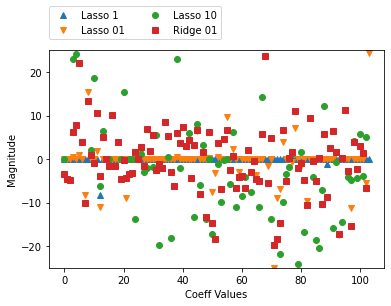

In [77]:
plt.plot(lass.coef_,'^',label='Lasso 1')
plt.plot(lass01.coef_,'v',label='Lasso 01')
plt.plot(lass10.coef_,'o',label='Lasso 10')

plt.plot(ridge01.coef_,'s',label='Ridge 01')

plt.xlabel('Coeff Values')
plt.ylabel('Magnitude')
plt.ylim(-25,25)
plt.legend(ncol=2,loc= (0,1.05))
plt.rcParams['figure.figsize'] = (10,3)


# Linear Classification

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [79]:
X,y = mglearn.datasets.make_forge()

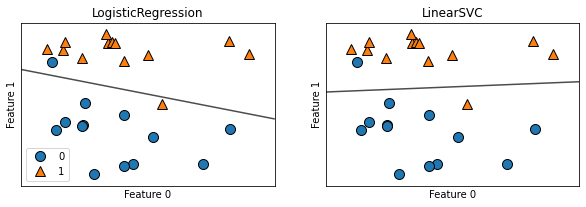

In [80]:
fig, axes = plt.subplots(1,2,figsize =(10,3))

for model,ax in zip([LogisticRegression(),LinearSVC()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,ax=ax,eps = 0.5,alpha=0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()

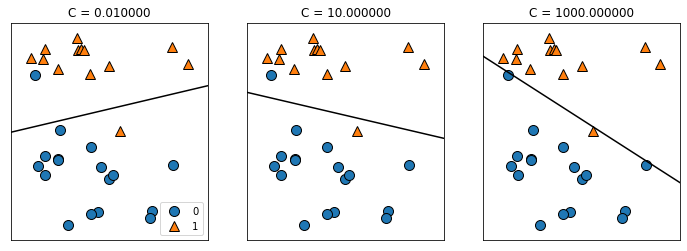

In [81]:
mglearn.plots.plot_linear_svc_regularization()

In [82]:
from sklearn.datasets import load_breast_cancer

In [83]:
cancer = load_breast_cancer()

In [84]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=42)

In [85]:
lreg =  LogisticRegression().fit(X_train,y_train)

In [86]:
lreg.score(X_train,y_train)

0.9436619718309859

In [87]:
lreg.score(X_test,y_test)

0.965034965034965

In [88]:
lreg100 =  LogisticRegression(C=100).fit(X_train,y_train)

In [89]:
lreg100.score(X_train,y_train)

0.9413145539906104

In [90]:
lreg100.score(X_test,y_test)

0.965034965034965

In [91]:
lreg01 =  LogisticRegression(C=0.1).fit(X_train,y_train)
print(lreg01.score(X_train,y_train))
print(lreg01.score(X_test,y_test))

0.9389671361502347
0.972027972027972


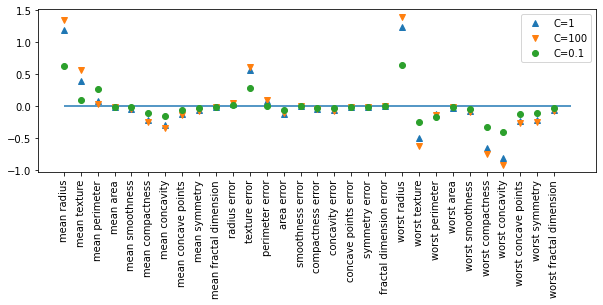

In [92]:
plt.plot(lreg.coef_.T,'^',label = 'C=1')
plt.plot(lreg100.coef_.T,'v',label = 'C=100')
plt.plot(lreg01.coef_.T,'o',label = 'C=0.1')
plt.hlines(0,0,cancer.data.shape[1])
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.legend()

Training 0.960093896713615
Test 0.958041958041958
Training 0.9107981220657277
Test 0.951048951048951
Training 0.9882629107981221
Test 0.972027972027972


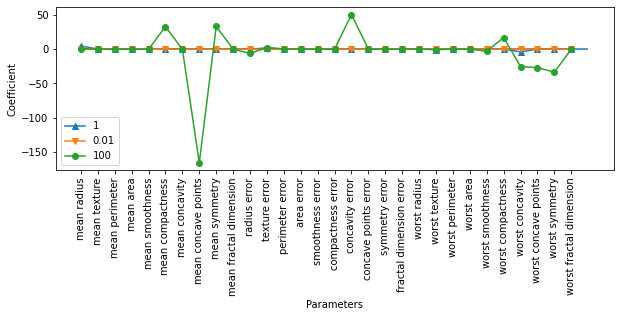

In [93]:
for C,marker in zip([1,0.01,100],['^','v','o']):
    l1_reg =  LogisticRegression(C=C,penalty='l1',solver='liblinear').fit(X_train,y_train)
    print('Training {}'.format(l1_reg.score(X_train,y_train)))
    print('Test {}'.format(l1_reg.score(X_test,y_test)))
    plt.plot(l1_reg.coef_.T,marker=marker,label='{}'.format(C))
plt.hlines(0,0,cancer.data.shape[1])
plt.xticks(range(0,cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.xlabel('Parameters')
plt.ylabel('Coefficient')
plt.legend()
plt.rcParams['figure.figsize'] = (5,2)
    

In [94]:
from sklearn.datasets import make_blobs

In [95]:
X,y = make_blobs(random_state=42)

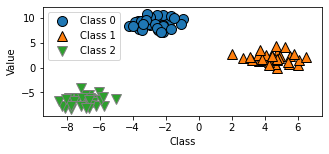

In [96]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Class')
plt.ylabel('Value')
plt.legend(['Class 0','Class 1','Class 2'],loc ='best')
plt.rcParams['figure.figsize'] = (5,3)

In [97]:
lsvm = LinearSVC().fit(X,y)

In [98]:
print(lsvm.coef_)
print(lsvm.intercept_)

[[-0.17492808  0.23141192]
 [ 0.47621589 -0.06937492]
 [-0.18913867 -0.20400478]]
[-1.07745284  0.13140511 -0.08605041]


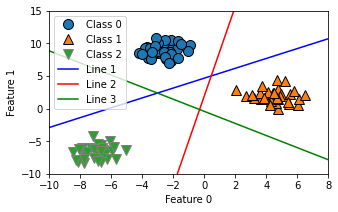

In [99]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(lsvm.coef_,lsvm.intercept_,['b','r','g']):
    plt.plot(line,-(coef[0]*line+intercept)/coef[1],color=color)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.legend(['Class 0','Class 1','Class 2','Line 1','Line 2','Line 3'],loc='best')
plt.rcParams['figure.figsize'] = (16,9)

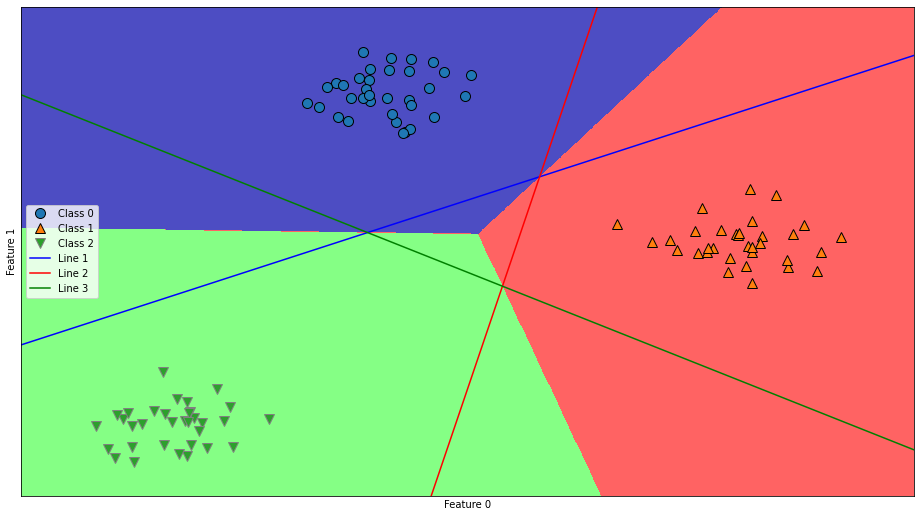

In [100]:
mglearn.plots.plot_2d_classification(lsvm,X,fill=True,alpha=0.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(lsvm.coef_,lsvm.intercept_,['b','r','g']):
    plt.plot(line,-(coef[0]*line+intercept)/coef[1],color=color)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.ylim(-10,13)
plt.xlim(-10,8)
plt.legend(['Class 0','Class 1','Class 2','Line 1','Line 2','Line 3'],loc='best')
plt.rcParams['figure.figsize'] = (15,9)

# Decison Tree

In [101]:
#pip install graphviz

Note: you may need to restart the kernel to use updated packages.


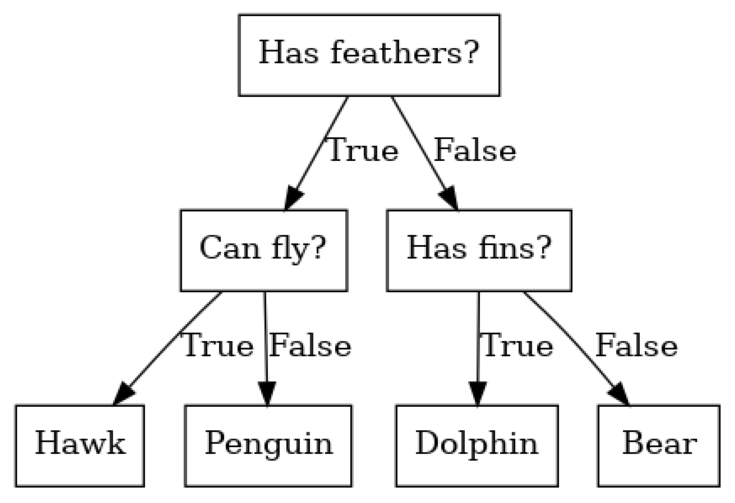

In [104]:
mglearn.plots.plot_animal_tree()

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
cancer = load_breast_cancer()

In [115]:
#cancer

In [110]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

In [111]:
tre =  DecisionTreeClassifier(random_state=0)

In [112]:
tre.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [113]:
tre.score(X_train,y_train)

1.0

In [114]:
tre.score(X_test,y_test)

0.9370629370629371

In [116]:
tre =  DecisionTreeClassifier(max_depth=4,random_state=0)

In [118]:
tre.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [121]:
print(tre.score(X_train,y_train))
print('{:.3f}'.format(tre.score(X_test,y_test)))

0.9882629107981221
0.951


In [122]:
from sklearn.tree import export_graphviz

In [124]:
export_graphviz(tre,out_file='Tree.dot',class_names=['malignant','benign'],feature_names=cancer.feature_names,filled=True,impurity=False)

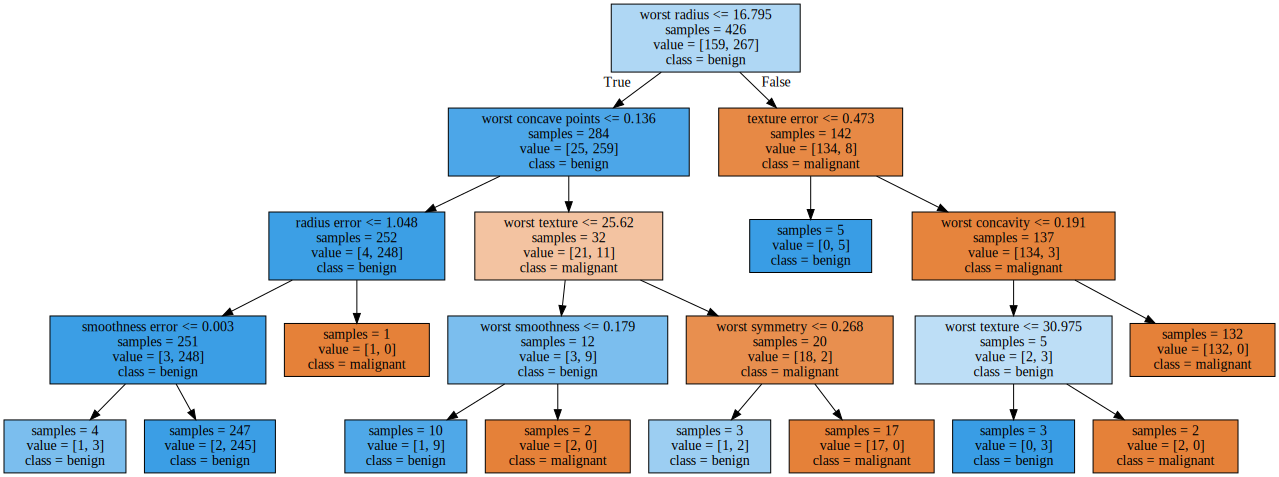

In [125]:
import graphviz
with open('Tree.dot') as f:
    tr = f.read()
graphviz.Source(tr)

In [128]:
print(tre.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


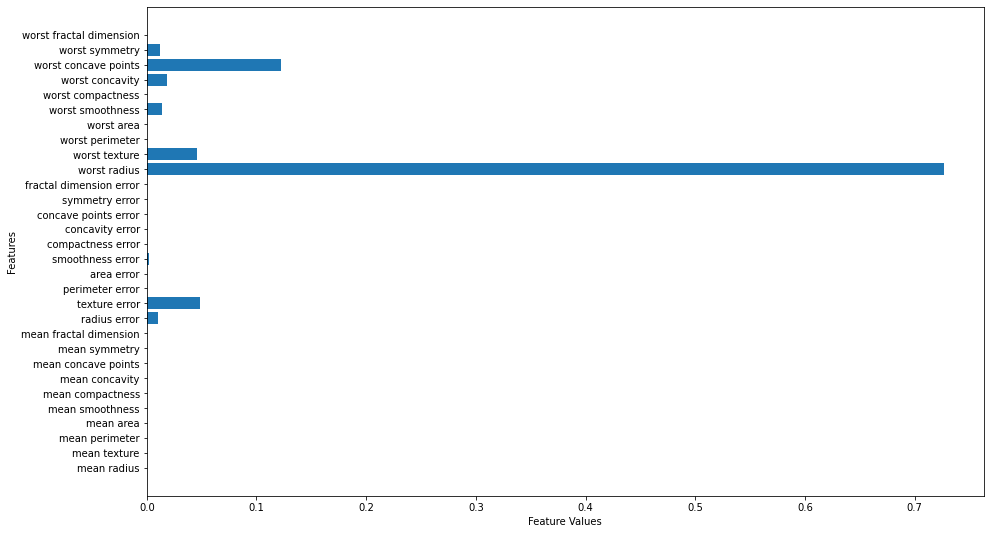

In [131]:
def plot_feature_importance(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel('Feature Values')
    plt.ylabel('Features')

plot_feature_importance(tre)

# Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [134]:
X,y = make_moons(n_samples=100,random_state=3,noise=0.25)

In [135]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

In [140]:
forest = RandomForestClassifier(n_estimators = 5,random_state =2)

In [141]:
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

Text(0.5, 1.0, 'Random forest')

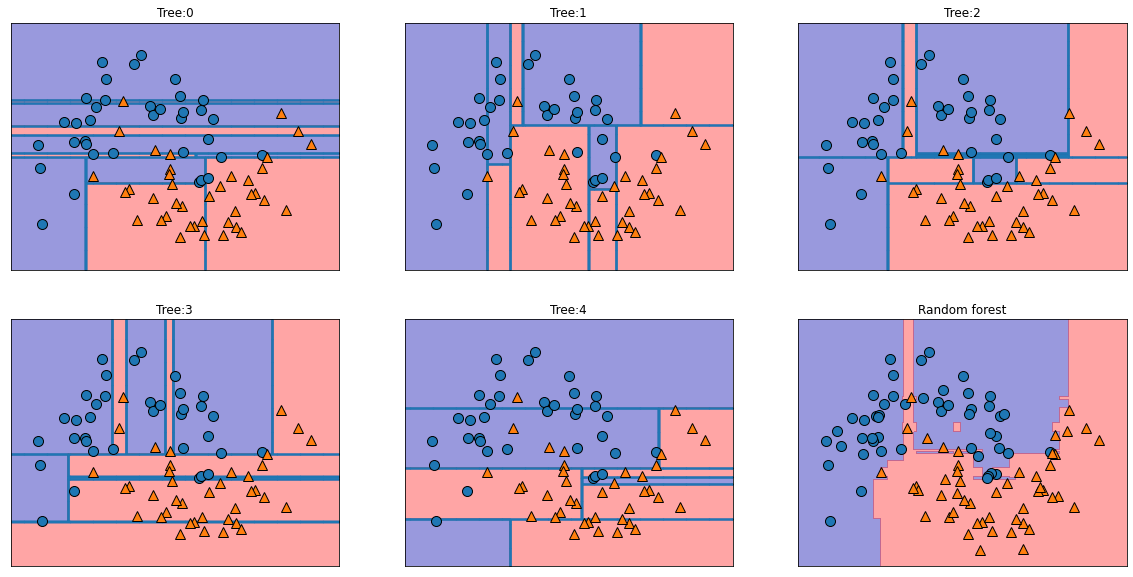

In [153]:
fig,axes =  plt.subplots(2,3,figsize=(20,10))

for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title('Tree:{}'.format(i))
    mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)
mglearn.plots.plot_2d_separator(forest,X_train,fill=True,ax=axes[-1,-1],alpha=0.4)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
axes[-1,-1].set_title('Random forest')

In [145]:
axes.ravel()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [158]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

In [167]:
forest = RandomForestClassifier(n_estimators=100,random_state=22)
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=22)

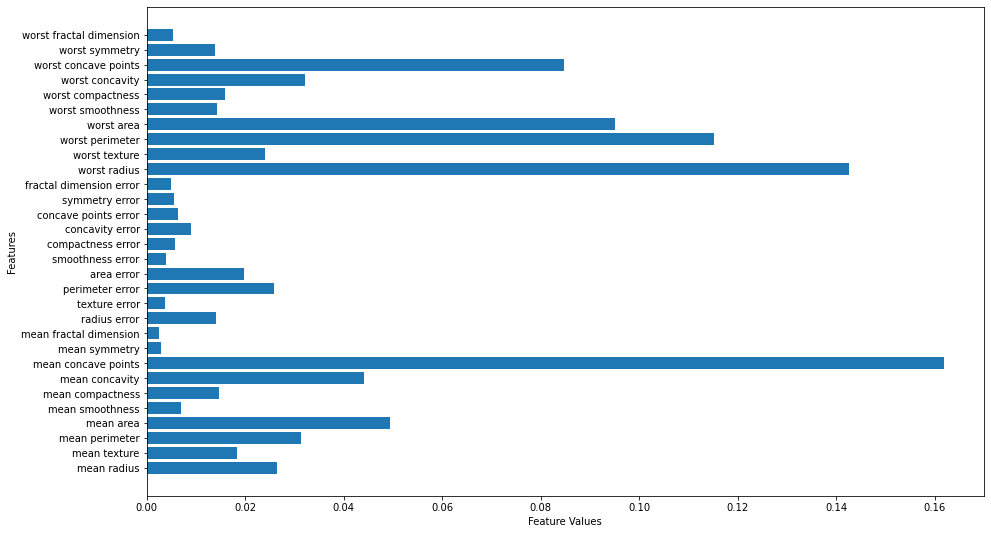

In [172]:
#plot_feature_importances_cancer(forest)
plot_feature_importance(forest)

# Gradient Boosting Classifier

In [173]:
from sklearn.ensemble import GradientBoostingClassifier

In [174]:
gbr = GradientBoostingClassifier(random_state=0)

In [175]:
gbr.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [176]:
gbr.score(X_train,y_train)

1.0

In [177]:
gbr.score(X_test,y_test)

0.958041958041958

In [179]:
gbrt = GradientBoostingClassifier(max_depth=1,random_state=0)
gbrt.fit(X_train,y_train)
print(gbrt.score(X_train,y_train))
print(gbrt.score(X_test,y_test))

0.9882629107981221
0.958041958041958


In [183]:
gbrtt = GradientBoostingClassifier(random_state=0,learning_rate=0.1,max_depth=2)
gbrtt.fit(X_train,y_train)
print(gbrtt.score(X_train,y_train))
print(gbrtt.score(X_test,y_test))

1.0
0.951048951048951


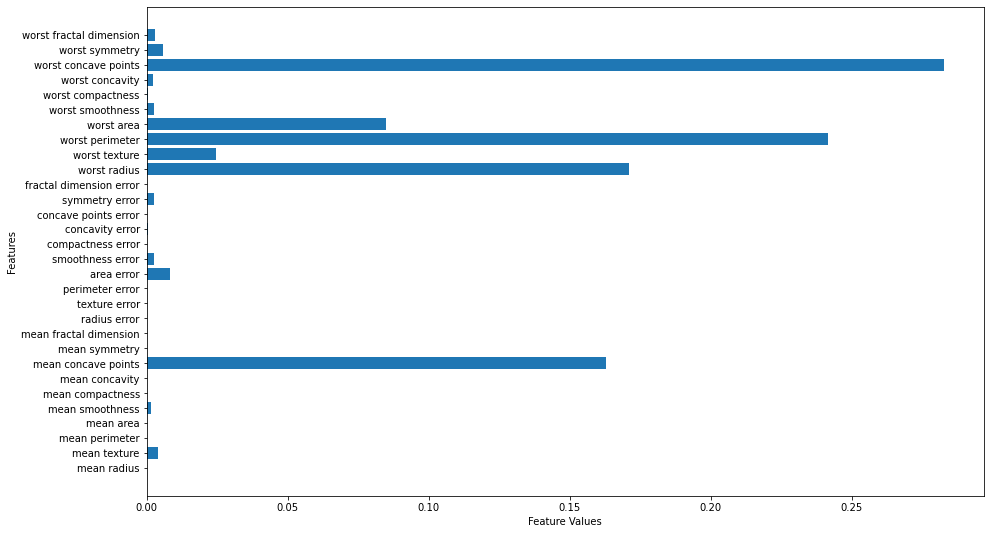

In [185]:
plot_feature_importance(gbrt)

# SVM

In [190]:
X,y = make_blobs(centers=4,random_state=8)
y = y%2

Text(0, 0.5, 'Y axis')

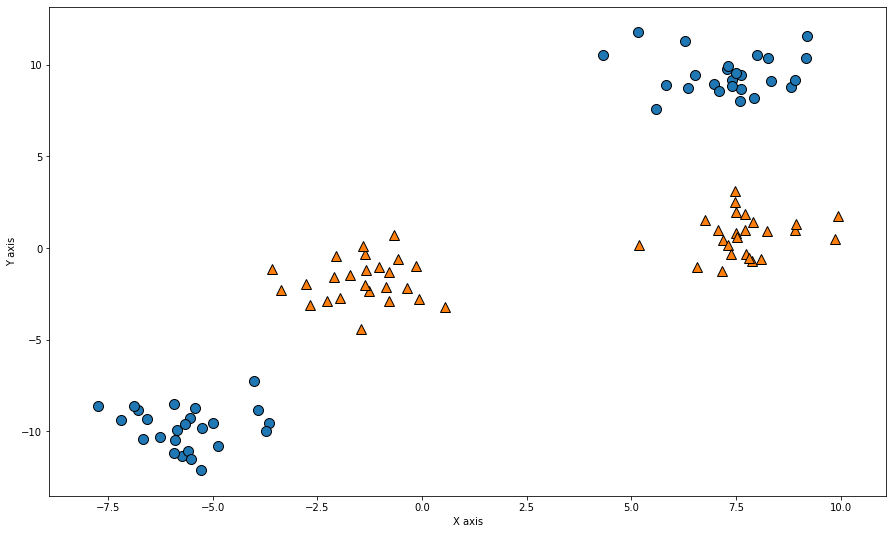

In [194]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('X axis')
plt.ylabel('Y axis')

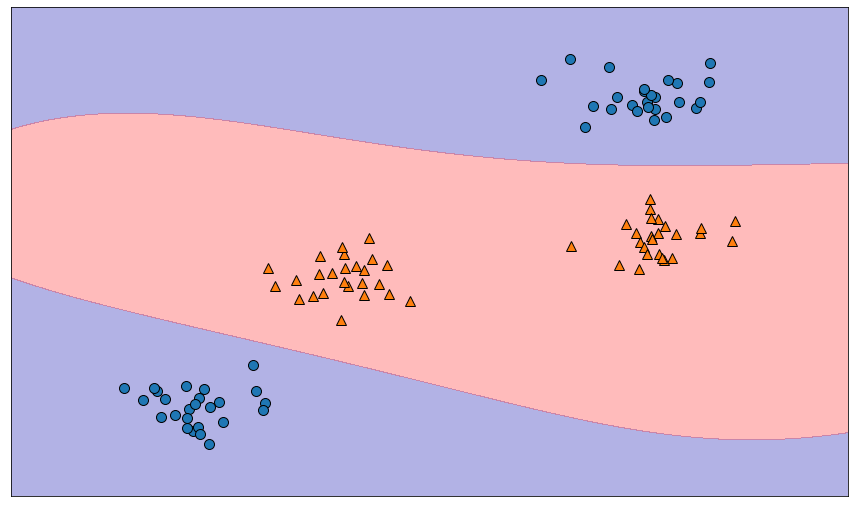

In [199]:
from sklearn.svm import SVC
svc = SVC().fit(X,y)
mglearn.plots.plot_2d_separator(svc,X,fill=True,alpha=0.3)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

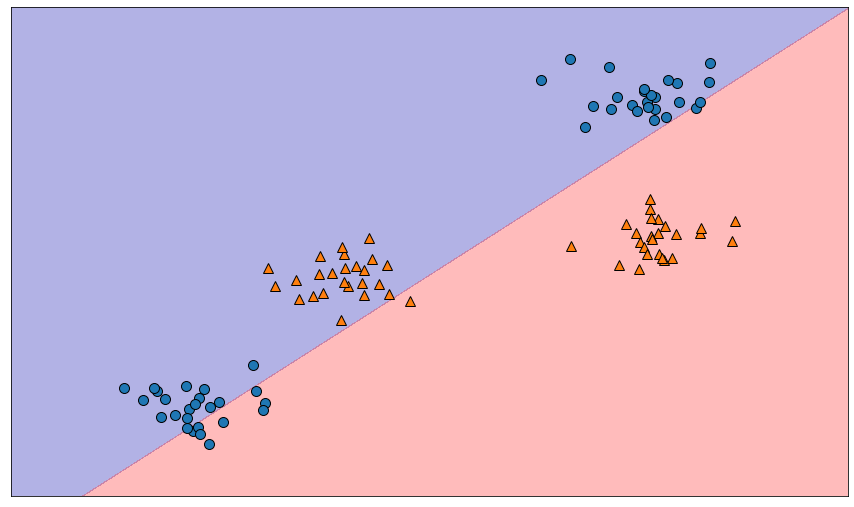

In [200]:
from sklearn.svm import LinearSVC
svc = LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator(svc,X,fill=True,alpha=0.3)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [202]:
X_new = np.hstack([X,X[:,1:]**2])

In [203]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

Text(0.5, 0, 'Z')

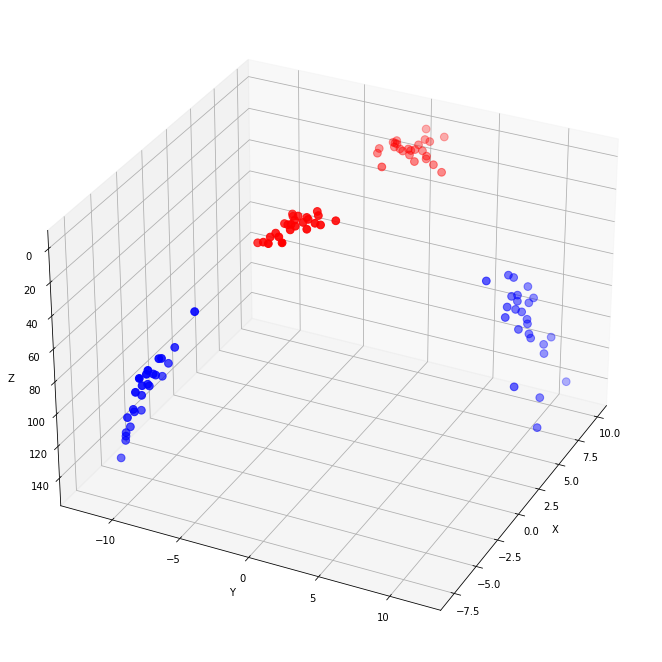

In [210]:
figure = plt.figure()
ax = Axes3D(figure,elev=-150, azim =-26)
mask = y == 0 
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap =mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',cmap =mglearn.cm2,s=60)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [212]:
linear_svm_3d = LinearSVC().fit(X_new,y)

In [214]:
coef, intercept=  linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_

Text(0.5, 0, 'Z')

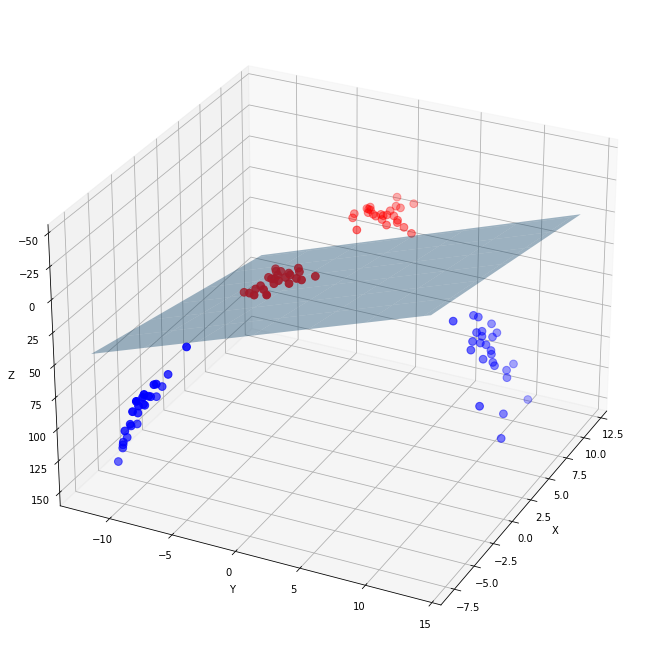

In [219]:
figure = plt.figure()
ax = Axes3D(figure,elev = -152,azim=-26)
xx = np.linspace(X_new[:,0].min(),X_new[:,0].max()+2,50)
yy = np.linspace(X_new[:,1].min(),X_new[:,1].max()+2,50)

XX,YY = np.meshgrid(xx,yy)
ZZ =  -(coef[0]*XX+coef[1]*YY + intercept)/coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.4)

ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap =mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',cmap =mglearn.cm2,s=60)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [220]:
X,y = mglearn.tools.make_handcrafted_dataset()

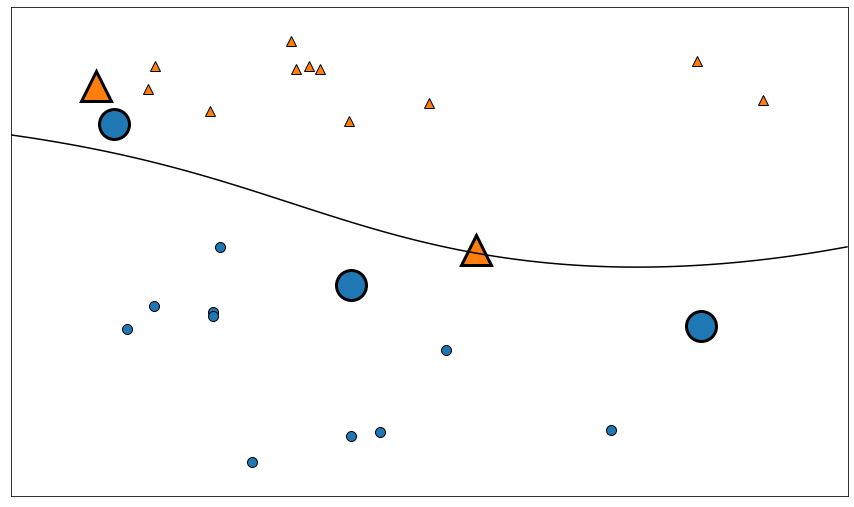

In [228]:
svm = SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel()>0

mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=30,markeredgewidth=3)

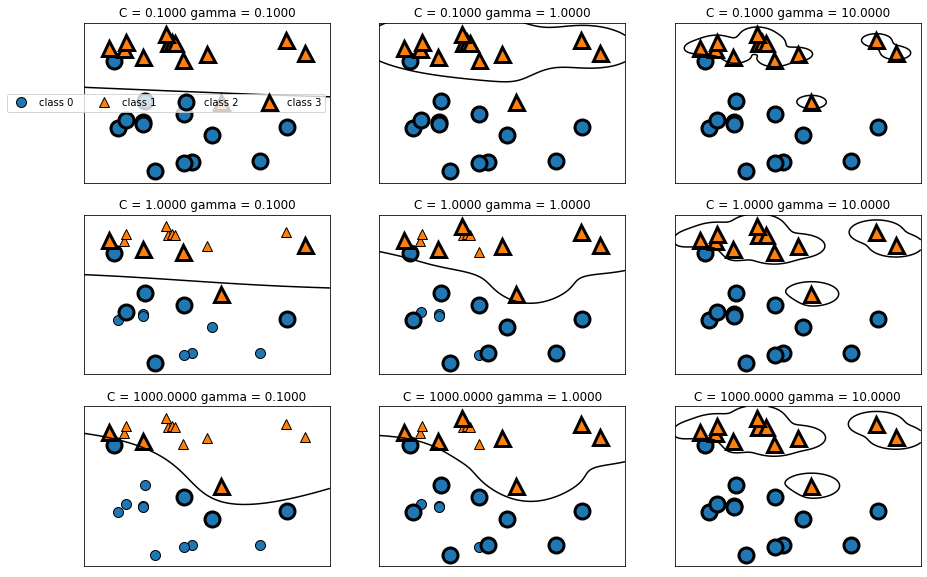

In [232]:
fig,axes =  plt.subplots(3,3,figsize=(15,10))

for ax,C in zip(axes,[-1,0,3]):
    for a,gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma = gamma,ax=a)
axes[0,0].legend(['class 0','class 1','class 2','class 3'],ncol=4,loc='best')

In [244]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)

In [235]:
svc = SVC().fit(X_train,y_train)
print(svc.score(X_train,y_train))
print(svc.score(X_test,y_test))

0.9225352112676056
0.916083916083916


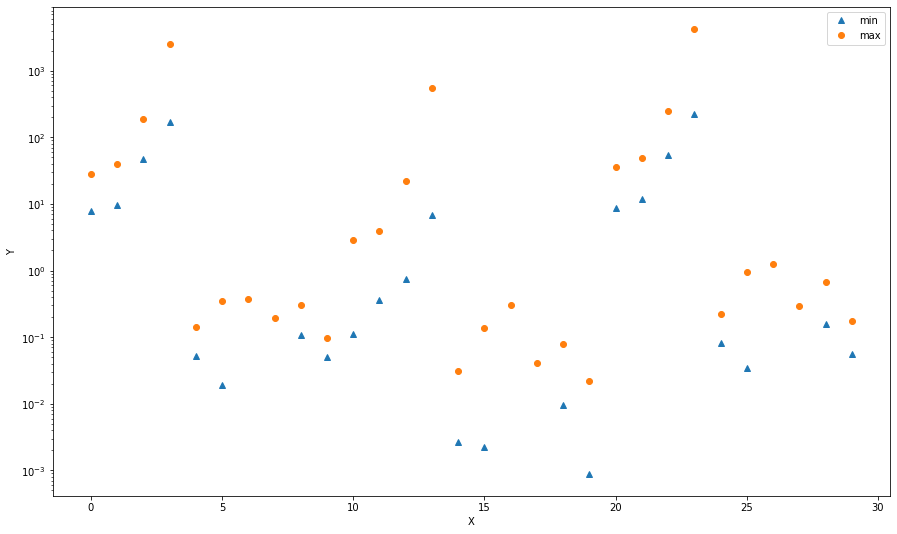

In [238]:
plt.plot(X_train.min(axis=0),'^',label='min')
plt.plot(X_train.max(axis=0),'o',label='max')
plt.xlabel('X')
plt.ylabel('Y')
plt.yscale('log')
plt.legend(loc='best')

In [245]:
min_training = X_train.min(axis=0)
range_training = (X_train-min_training).max(axis=0)
X_train_scaled = (X_train-min_training)/range_training

In [246]:
min_training = X_test.min(axis=0)
range_training = (X_test-min_training).max(axis=0)
X_test_scaled = (X_test-min_training)/range_training

In [241]:
min_training = y_train.min(axis=0)
range_training = (y_train-min_training).max(axis=0)
y_train_scaled = (y_train-min_training)/range_training

In [242]:
min_training = y_test.min(axis=0)
range_training = (y_test-min_training).max(axis=0)
y_test_scaled = (y_test-min_training)/range_training

In [249]:
svc_ = SVC().fit(X_train_scaled,y_train)
print(svc_.score(X_train_scaled,y_train))
print(svc_.score(X_test_scaled,y_test))

0.9906103286384976
0.8741258741258742


In [257]:
svc_ = SVC(C=1000,gamma=0.1).fit(X_train_scaled,y_train)
print(svc_.score(X_train_scaled,y_train))
print(svc_.score(X_test_scaled,y_test))

0.9976525821596244
0.916083916083916


# MLP

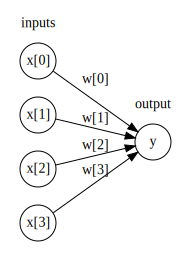

In [259]:
display(mglearn.plots.plot_logistic_regression_graph())

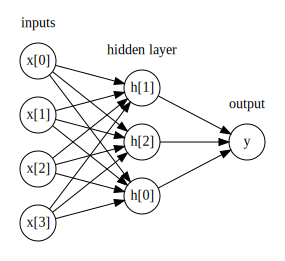

In [260]:
display(mglearn.plots.plot_single_hidden_layer_graph())

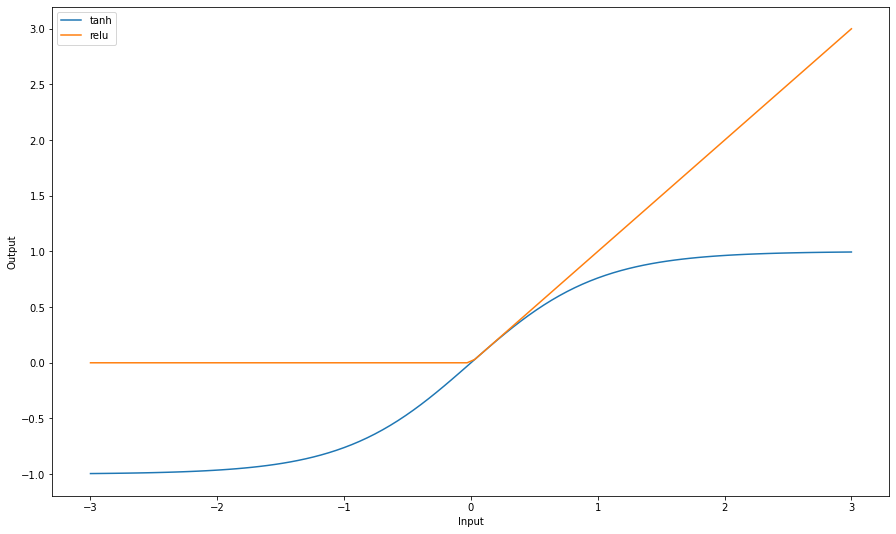

In [261]:
line =  np.linspace(-3,3,100)
plt.plot(line,np.tanh(line),label='tanh')
plt.plot(line,np.maximum(line,0),label='relu')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend(loc='best')


In [264]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

In [265]:
X,y = make_moons(random_state=0,noise=0.25,n_samples=100)

In [266]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=0)

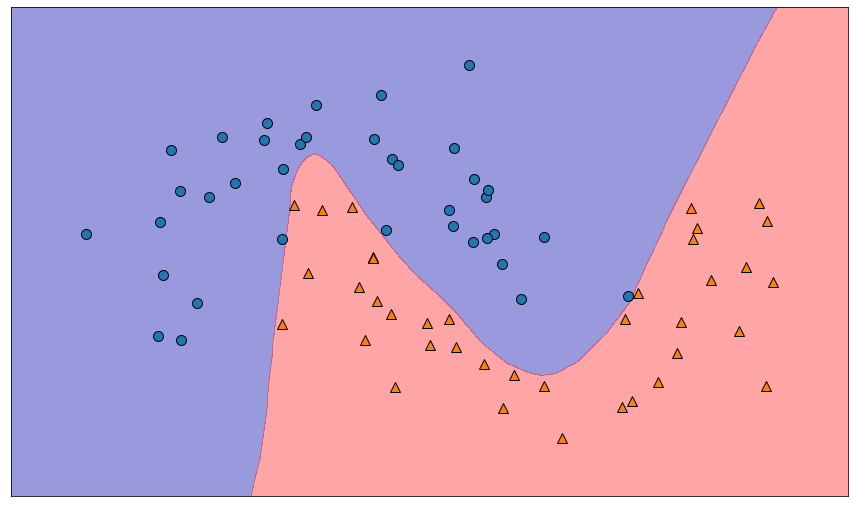

In [272]:
mlp =  MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.4)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

In [273]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)

In [275]:
mlp_ =  MLPClassifier(random_state=0).fit(X_train,y_train)
print(mlp_.score(X_train,y_train))
print(mlp_.score(X_test,y_test))

0.9483568075117371
0.9230769230769231


In [276]:
mean_train =  X_train.mean(axis=0)
std_dev= X_train.std(axis=0)
X_train_scaled =  (X_train-mean_train)/std_dev
X_test_scaled =  (X_test-mean_train)/std_dev

In [277]:
mlp_ =  MLPClassifier(random_state=0).fit(X_train_scaled,y_train)
print(mlp_.score(X_train_scaled,y_train))
print(mlp_.score(X_test_scaled,y_test))

0.9976525821596244
0.951048951048951


In [280]:
mlp_ =  MLPClassifier(max_iter = 1000,random_state=0).fit(X_train_scaled,y_train)
print(mlp_.score(X_train_scaled,y_train))
print(mlp_.score(X_test_scaled,y_test))

0.9976525821596244
0.958041958041958


In [295]:
mlp_ =  MLPClassifier(max_iter = 1000,alpha=1,random_state=0).fit(X_train_scaled,y_train)
print(mlp_.score(X_train_scaled,y_train))
print(mlp_.score(X_test_scaled,y_test))

0.9906103286384976
0.965034965034965


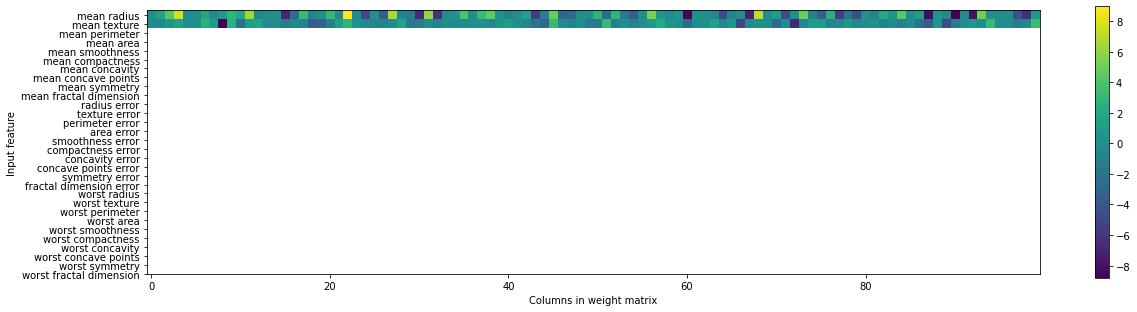

In [301]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()